# Cabildo de Mujeres STEM - 01

Instalar wordcloud en kernel en caso que no esté instalado

In [28]:
import sys
!{sys.executable} -m pip  install wordcloud 
import sys
!{sys.executable} -m pip install stop_words

Primero cargamos las librerias necesarias para procesar texto y data frames

In [53]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords

Cargamos el archivo con las respuestas

In [54]:
rdata = pd.read_excel("C:/Users/Monin/Documents/Rcran/STEM/respuestas_cabildo_stem_01.xlsx")

Realizamos una general revisión de los datos

In [55]:
rdata.shape
rdata.sample(3)

,ID,PREGUNTA,GRUPO,TEXTO
5,P1_08,P1,8,Debido a la falta de instancias de políticas p...
10,P2_03,P2,3,Se definieron 3 pilares de la sustentabilidad ...
22,P3_09,P3,9,"Eliminar el estado subsidiario, que sea un est..."


Definimos una función para quitar números y puntuación y dejar en minúscula cada palabra. Guardamos el texto en un nuevo campo llamado 'tokenized'

In [56]:
def clean_text(texto):
    texto= str(texto)
    clean1 = re.sub(r"[^a-z0-9]"," ",str(texto.lower()))
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', " ",str( texto.lower()))
    return re.sub(r'\W+', ' ', clean1)

rdata['tokenized'] = rdata['TEXTO'].map(lambda x: clean_text(x)) 
rdata['tokenized'].head()


0     qué nos convoca la importancia de la particip...
1    ser parte de los espacios para generar diálogo...
2    en general todes quisimos participar en este c...
3    reunirnos con otras generaciones aportar desde...
4    interés por nuestro rol como mujeres en la soc...
Name: tokenized, dtype: object

Revisamos algunas estadísticas generales y separamos los textos palabra por palabra

In [57]:
rdata['num_wds'] = rdata['tokenized'].apply(lambda x: len(x.split()))
#Alguas estadíticas
print("Promedio: %s \nMáximo: %s \nMínimo: %s" % (rdata['num_wds'].mean(), rdata['num_wds'].max(), rdata['num_wds'].min()))

Promedio: 107.91176470588235 
Máximo: 523 
Mínimo: 0


Quitamos las palabras que no aportan mayor información descriptiva

In [58]:
rdata = rdata[rdata['num_wds']>4]
rdata['uniq_wds'] = rdata['tokenized'].str.split().apply(lambda x: len(set(x)))
rdata['uniq_wds'].head()

0    33
1    32
2    55
3    60
4    38
Name: uniq_wds, dtype: int64

In [59]:
print("Promedio: %s \nMáximo: %s \nMínimo: %s" % (rdata['num_wds'].mean(), rdata['num_wds'].max(), rdata['num_wds'].min()))


Promedio: 130.85714285714286 
Máximo: 523 
Mínimo: 7


Realizamos el mapa de palabras para verlo más bonito

In [64]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from stop_words import get_stop_words
from matplotlib.colors import LinearSegmentedColormap

Unimos los textos para verlos de manera global y por pregunta

In [65]:
text = ' '.join(rdata['tokenized'].str.lower())

# PREGUNTA 1
rdata_p1 = rdata[rdata.PREGUNTA=='P1']
text_p1 = ' '.join(rdata_p1['tokenized'].str.lower())

# PREGUNTA 2
rdata_p2 = rdata[rdata.PREGUNTA=='P2']
text_p2 = ' '.join(rdata_p2['tokenized'].str.lower())

# PREGUNTA 3
rdata_p3 = rdata[rdata.PREGUNTA=='P3']
text_p3 = ' '.join(rdata_p3['tokenized'].str.lower())

Creamos el diccionario de stopwords

In [66]:
stop_words = get_stop_words('es')
stopwords = set(stop_words) #STOPWORDS

Podemos definir algunos colores para cada nube

In [85]:
w=3200
h=1600
cmap_g = LinearSegmentedColormap.from_list("mycmap", ["greenyellow", "darkcyan"])
cmap_p1 = LinearSegmentedColormap.from_list("mycmap", ["pink", "c"])
cmap_p2 = LinearSegmentedColormap.from_list("mycmap", ["steelblue", "lightcoral"])
cmap_p3 = LinearSegmentedColormap.from_list("mycmap", ["lime", "deeppink"])


Creamos la nubes de palabras

In [86]:
wordcloud_g  = WordCloud(stopwords=stopwords,width=w,height=h,collocations=False,background_color="white",colormap = cmap_g).generate(text)
wordcloud_01 = WordCloud(stopwords=stopwords,width=w, height=h,collocations=False,background_color="white", colormap=cmap_p1).generate(text_p1)
wordcloud_02 = WordCloud(stopwords=stopwords,width=w, height=h,collocations=False,background_color="white", colormap=cmap_p2).generate(text_p2)
wordcloud_03 = WordCloud(stopwords=stopwords,width=w, height=h,collocations=False,background_color="white", colormap=cmap_p3).generate(text_p3)



Graficamos

NUBE DE PALABRAS GENERAL


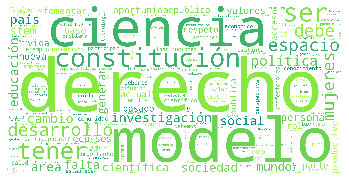

In [87]:
print("NUBE DE PALABRAS GENERAL")
wordcloud_g.to_file("C:/Users/Monin/Documents/Rcran/STEM/img/wc_g.png")
plt.imshow(wordcloud_g)
plt.axis("off")
plt.show()


NUBE DE PALABRAS TEMA 1


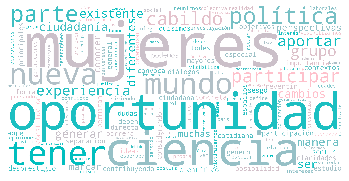

In [88]:
print("NUBE DE PALABRAS TEMA 1")
wordcloud_01.to_file("C:/Users/Monin/Documents/Rcran/STEM/img/wordcloud_01.png")
plt.imshow(wordcloud_01)
plt.axis("off")
plt.show()


NUBE DE PALABRAS TEMA 2


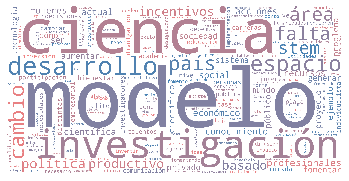

In [89]:
print("NUBE DE PALABRAS TEMA 2")
wordcloud_02.to_file("C:/Users/Monin/Documents/Rcran/STEM/img/wordcloud_02.png")

plt.imshow(wordcloud_02)
plt.axis("off")
plt.show()

NUBE DE PALABRAS TEMA 3


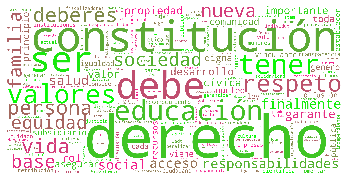

In [90]:
print("NUBE DE PALABRAS TEMA 3")
wordcloud_03.to_file("C:/Users/Monin/Documents/Rcran/STEM/img/wordcloud_03.png")

plt.imshow(wordcloud_03)
plt.axis("off")
plt.show()


In [91]:
# Bonus - Mapa de Palabras con Matapacos Shape

In [75]:
from PIL import Image
#probando monitos
shape_matapacos = np.array(Image.open("C:/Users/Monin/Documents/Rcran/STEM/img/negro_matapacos.png"))


In [78]:
cmap_mp= LinearSegmentedColormap.from_list("mycmap", ["deeppink", "c"])

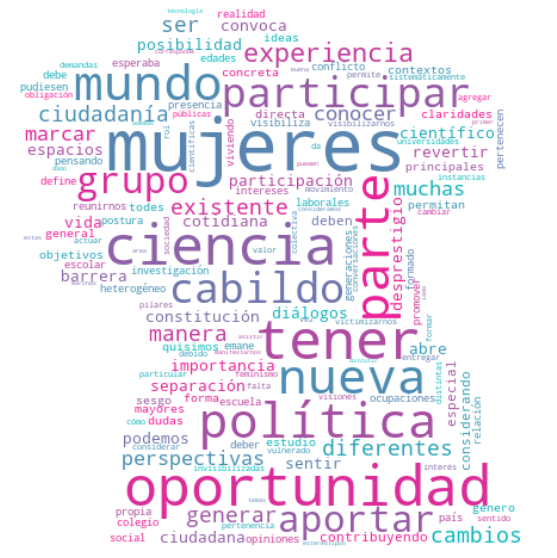

In [79]:
wc = WordCloud(stopwords=stopwords, mask=shape_matapacos,width=w, height=h,collocations=False,background_color="white", colormap=cmap_mp).generate(text_p1)

wc.to_file("C:/Users/Monin/Documents/Rcran/STEM/img/mata_paco_nube.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


Un abrazo a todas! y a seguir trabajando por un Chile mejor
Hasta que la dignidad se haga costumbre ;) 